In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [6]:
import sys
print(sys.version_info)
print(pd.__version__)
print(tf.version.VERSION)

sys.version_info(major=3, minor=8, micro=8, releaselevel='final', serial=0)
1.2.3
2.4.0-rc0


In [7]:
split_idx = 1000
IMG_DIM = 96

In [8]:
training_df = pd.read_csv('data/training.csv')
training_df.info()
x_cols =  list(training_df.drop('Image', axis=1).columns)
training_df[x_cols] = training_df[x_cols].fillna(training_df[x_cols].mean())
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [9]:
training_df.iloc[:,0:30].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7049 non-null   float64
 1   left_eye_center_y          7049 non-null   float64
 2   right_eye_center_x         7049 non-null   float64
 3   right_eye_center_y         7049 non-null   float64
 4   left_eye_inner_corner_x    7049 non-null   float64
 5   left_eye_inner_corner_y    7049 non-null   float64
 6   left_eye_outer_corner_x    7049 non-null   float64
 7   left_eye_outer_corner_y    7049 non-null   float64
 8   right_eye_inner_corner_x   7049 non-null   float64
 9   right_eye_inner_corner_y   7049 non-null   float64
 10  right_eye_outer_corner_x   7049 non-null   float64
 11  right_eye_outer_corner_y   7049 non-null   float64
 12  left_eyebrow_inner_end_x   7049 non-null   float64
 13  left_eyebrow_inner_end_y   7049 non-null   float

In [10]:
y = training_df.iloc[:,0:30].to_numpy()
x = np.array(training_df['Image'].str.split().tolist(), dtype='float').reshape(-1, IMG_DIM,IMG_DIM) / 255.0
print(x.shape, y.shape)

(7049, 96, 96) (7049, 30)


In [11]:
y_test = y[0:split_idx,:]
x_test = x[0:split_idx,:,:]
y_train = y[split_idx:,:]
x_train = x[split_idx:,:,:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6049, 96, 96), (6049, 30), (1000, 96, 96), (1000, 30))

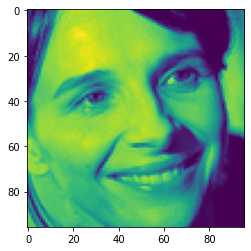

In [12]:
rnd = 739
plt.imshow(x_train[rnd:rnd+1,:,:].reshape(96,96))

In [15]:
act = 'relu'
pad = 'same'
strd = 1
def create_model():
    input_layer = tf.keras.Input(shape = (IMG_DIM, IMG_DIM,1))
    _ = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation = act, padding = pad, strides=1)(input_layer)
    _ = tf.keras.layers.BatchNormalization()(_)
    _ = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation = act, padding = pad, strides=strd)(_)
    _ = tf.keras.layers.BatchNormalization()(_)
    _ = tf.keras.layers.MaxPool2D()(_)
    _ = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation = act, padding = pad, strides = strd)(_)
    _ = tf.keras.layers.BatchNormalization()(_)
    _ = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation = act, padding = pad, strides = strd)(_) 
    _ = tf.keras.layers.BatchNormalization()(_)
    _ = tf.keras.layers.MaxPool2D()(_)
    _ = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation = act, padding = pad, strides = strd)(_) 
    _ = tf.keras.layers.BatchNormalization()(_)
    _ = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation = act, padding = pad, strides = strd)(_)
    _ = tf.keras.layers.BatchNormalization()(_)
    _ = tf.keras.layers.MaxPool2D()(_)
    _ = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation = act, padding = pad, strides = strd)(_) 
    _ = tf.keras.layers.BatchNormalization()(_)
    _ = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation = act, padding = pad, strides = strd)(_)
    _ = tf.keras.layers.BatchNormalization()(_)
    _ = tf.keras.layers.MaxPool2D()(_)
    _ = tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation = act, padding = pad, strides = strd)(_) 
    _ = tf.keras.layers.BatchNormalization()(_)
    _ = tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation = act, padding = pad, strides = strd)(_)
    _ = tf.keras.layers.BatchNormalization()(_)
    _ = tf.keras.layers.MaxPool2D()(_)

    common_layer = tf.keras.layers.Flatten()(_)
    common_layer = tf.keras.layers.Dense(3000, activation= act)(common_layer)
    common_layer = tf.keras.layers.Dense(1000, activation= act)(common_layer)
    common_layer = tf.keras.layers.Dense(512, activation= act)(common_layer)
    output_layer = tf.keras.layers.Dense(30, name="face_landmarks")(common_layer)
    model = tf.keras.Model(inputs=input_layer, outputs = output_layer, name="facial-keypoints")
    return model

In [16]:
model = create_model()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy', tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "facial-keypoints"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 96, 96, 1)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 96, 96, 32)        320       
_________________________________________________________________
batch_normalization_10 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 48, 48, 64)   

In [17]:
model.fit(x = x_train, y = y_train, epochs=60, batch_size = 256, verbose=1)

Epoch 1/60
24/24 [==============================] - 44s 2s/step - loss: 1346.9138 - mae: 28.4337 - accuracy: 0.1719 - root_mean_squared_error: 35.9324
Epoch 2/60
24/24 [==============================] - 43s 2s/step - loss: 23.3259 - mae: 3.5490 - accuracy: 0.4132 - root_mean_squared_error: 4.8118
Epoch 3/60
24/24 [==============================] - 44s 2s/step - loss: 10.6912 - mae: 2.2140 - accuracy: 0.5492 - root_mean_squared_error: 3.2687
Epoch 4/60
24/24 [==============================] - 45s 2s/step - loss: 8.4096 - mae: 1.7898 - accuracy: 0.6136 - root_mean_squared_error: 2.8996
Epoch 5/60
24/24 [==============================] - 45s 2s/step - loss: 8.1183 - mae: 1.7732 - accuracy: 0.6165 - root_mean_squared_error: 2.8489
Epoch 6/60
24/24 [==============================] - 48s 2s/step - loss: 9.8525 - mae: 2.1167 - accuracy: 0.6188 - root_mean_squared_error: 3.1353
Epoch 7/60
24/24 [==============================] - 52s 2s/step - loss: 8.4278 - mae: 1.8216 - accuracy: 0.5922 - roo

24/24 [==============================] - 68s 3s/step - loss: 3.5007 - mae: 1.2041 - accuracy: 0.7651 - root_mean_squared_error: 1.8707
Epoch 57/60
24/24 [==============================] - 69s 3s/step - loss: 3.4370 - mae: 1.2041 - accuracy: 0.7673 - root_mean_squared_error: 1.8537
Epoch 58/60
24/24 [==============================] - 69s 3s/step - loss: 3.4448 - mae: 1.1873 - accuracy: 0.7659 - root_mean_squared_error: 1.8554
Epoch 59/60
24/24 [==============================] - 69s 3s/step - loss: 3.5981 - mae: 1.2465 - accuracy: 0.7674 - root_mean_squared_error: 1.8959
Epoch 60/60
24/24 [==============================] - 64s 3s/step - loss: 3.5399 - mae: 1.2634 - accuracy: 0.7933 - root_mean_squared_error: 1.8744


In [18]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 3s 75ms/step - loss: 6.5282 - mae: 1.8626 - accuracy: 0.5730 - root_mean_squared_error: 2.5550


[6.528191566467285, 1.8626309633255005, 0.5730000138282776, 2.555032730102539]

In [38]:
test = pd.read_csv('data/test.zip')

In [41]:
test_imgid = test['ImageId'].to_numpy()
test_data = np.array(test['Image'].str.split().tolist(), dtype='float').reshape(-1, IMG_DIM,IMG_DIM) / 255.0
test_imgid.shape, test_data.shape

((1783,), (1783, 96, 96))

In [42]:
preds = model.predict(test_data)

In [54]:
preds.shape

(1783, 30)

In [47]:
cols = list(training_df.columns)

In [19]:
lookup_table = pd.read_csv('data/IDLookupTable.csv')

In [94]:
rowids = []
locs = []

In [100]:
for index, row in lookup_table.iterrows():
    #if index > 10 : break
    rowid = row['RowId']
    imgid = row['ImageId']
    feature_name = row['FeatureName']
    colid = cols.index(feature_name)
    #print(rowid, colid)
    location = preds[imgid-1:imgid,colid:colid+1].reshape(1)[0]
    rowids.append(rowid)
    locs.append(location)
    #print(rowid, location)

In [97]:
final_df = pd.DataFrame.from_dict({'RowId':rowids, 'Location':locs})

In [98]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RowId     27124 non-null  int64  
 1   Location  27124 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 423.9 KB


In [99]:
final_df.to_csv('data/submission.csv' , index=False)